# Importing the Dependencies

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import stats
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
import time
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, Flatten

# Loading the Dataset

In [6]:
df = pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# Step 1: Data Overview
The first step after loading the dataset is to see the data from Eagle Eye, so in the below code, we check the null values in the dataset, then the dtypes; in the data set, null values are so dirty they could affect our model badly, so to remove them is crucial in every dataset, and checking dtypes will tell us what types of the data are in our dataset, helps us in handling the data, the duplicate values are highly crucial to remove in some dataset, it can lead our model to the biases, the at the end the unique will let us know in each column how many uniques values are present, helping us to understand the continuity of the data.

In [8]:
#checking the null values
print("Null Values: ", df.isna().sum().sum(), "\n")

#checking the shape of the dataset
print(f"Shape of the dataset: {df.shape}\n")

#checking the type of datset
print(df.dtypes)

#checking the duplicates
print("\nDuplicates")
print(df.duplicated().sum(), "\n")

#checking the nunique values in the dataset
for i in range(len(df.columns)):
    z = df.iloc[:,i].nunique()
    name = df.columns[i]
    print(f"For {name} the nuniques are {z}")

Null Values:  0 

Shape of the dataset: (1338, 7)

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

Duplicates
1 

For age the nuniques are 47
For sex the nuniques are 2
For bmi the nuniques are 548
For children the nuniques are 6
For smoker the nuniques are 2
For region the nuniques are 4
For charges the nuniques are 1337


In the dataset we have two common types of the data, one is catrgorical and other one is numerical, so we get the columns name making it easy to handle in in the future, 

In [9]:
categorical_feature = [x for x in df.columns if df.dtypes[x] == 'object']  
numerical_feature = [x for x in df.columns if df.dtypes[x] == 'int64' or df.dtypes[x] == 'float64']

print(f"Numerical Features: {numerical_feature}\n")
print(f'Categorical Features: {categorical_feature}\n')

Numerical Features: ['age', 'bmi', 'children', 'charges']

Categorical Features: ['sex', 'smoker', 'region']



# Step 2: Descriptive Statistics

The `df.describe()` function provides a summary of key descriptive statistics for the dataset's numerical columns, including the count, mean, standard deviation, minimum, 25th percentile, median (50th percentile), 75th percentile, and maximum values. This summary helps in understanding the central tendency, dispersion, and distribution of the data. For categorical columns, it offers a count of non-null values, the number of unique categories, the most frequent category (mode), and its frequency, giving insights into the distribution and frequency of categorical data.

In [14]:
#Summary statistics of Numerical Features
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [16]:
#Summary statistics of Categoical Features
df.describe(include = 'object')

,sex,smoker,region
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


# Step 3: Univariate Analysis
In the univariate analysis, histograms were plotted for the numerical features of the dataset using `df.hist()`. This visualization provides insights into the distribution of each feature, helping to identify patterns, skewness, and potential outliers. By dividing the data into 30 bins, we get a detailed view of how values are spread across different ranges, which is crucial for understanding the characteristics of the dataset.

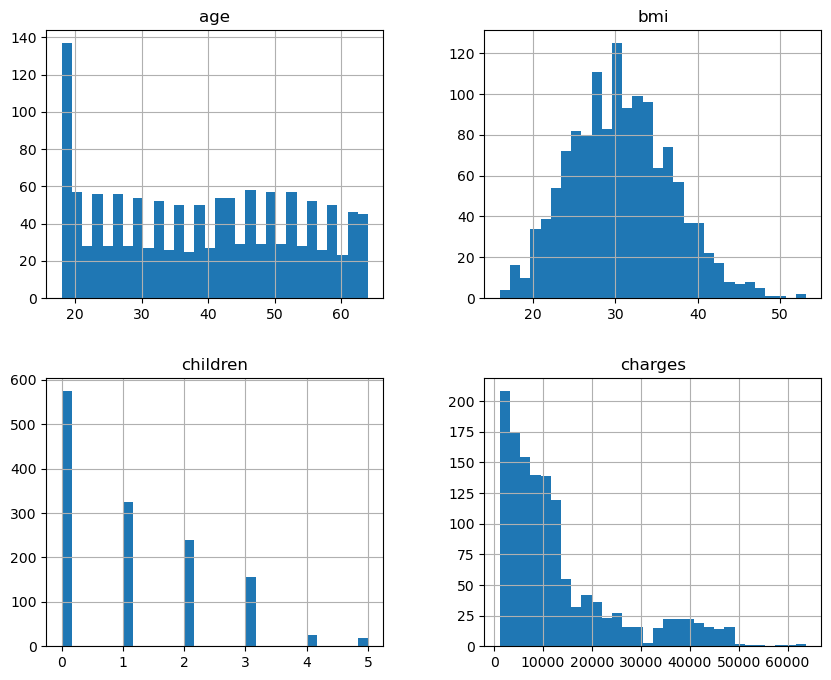

In [19]:
#Hist plot of numerical features
df.hist(bins = 30, figsize = (10, 8))
plt.show()

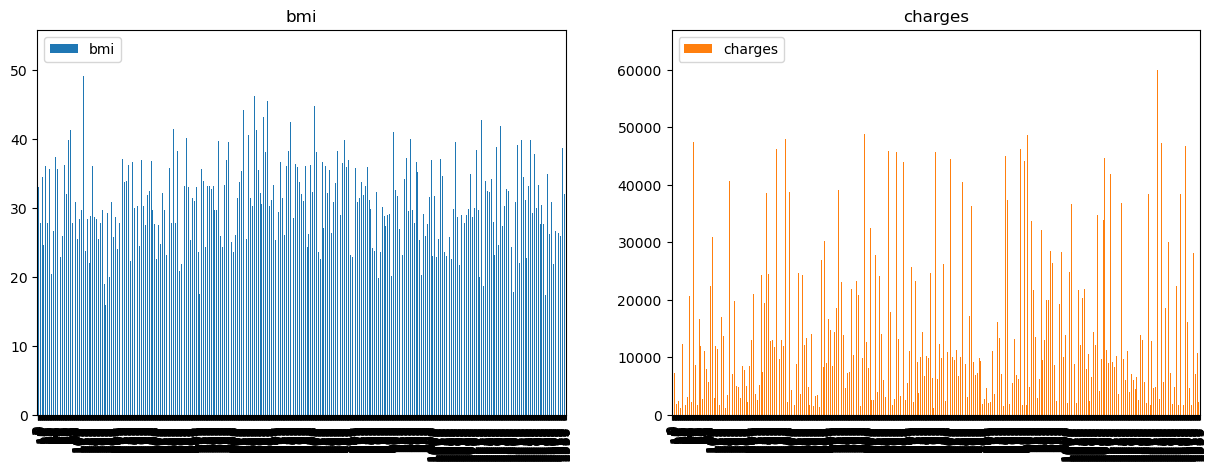

In [21]:
df[['bmi', 'charges']].plot(kind= 'bar', subplots = True, layout=(1,2), figsize=(15, 5))
plt.show()

The code generates bar plots for the categorical features `sex`, `smoker`, and `region` to visualize their frequency distribution. These plots help in quickly understanding the distribution of these categories in the dataset, showing how many entries fall under each category.

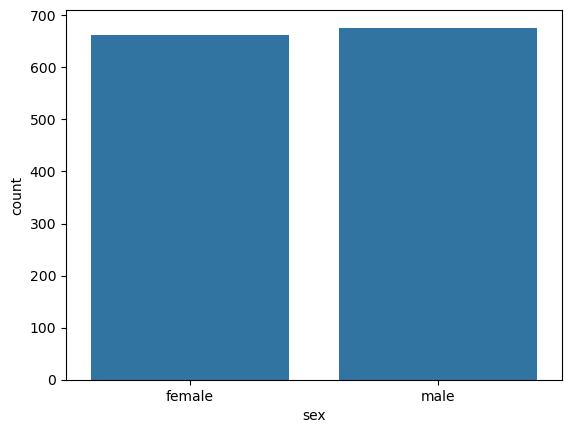

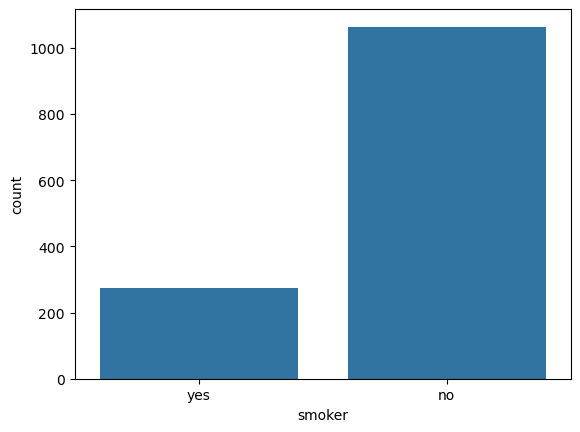

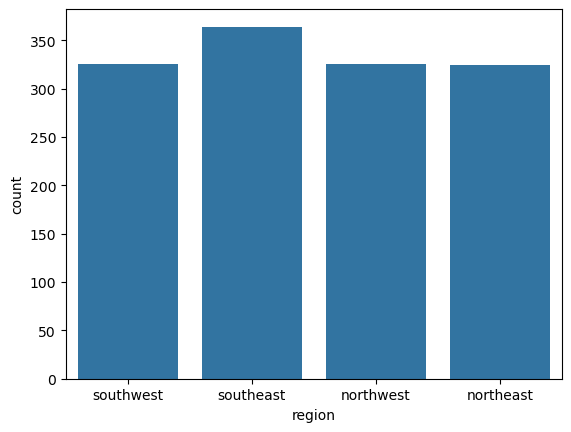

In [22]:
# Bar plot for categorical features
sns.countplot(x='sex', data=df)
plt.show()

sns.countplot(x='smoker', data=df)
plt.show()

sns.countplot(x='region', data=df)
plt.show()

# Step 4: Bivariate Analysis
In the bivariate analysis, scatter plots, a correlation heatmap, and box plots were used to explore relationships between variables. Scatter plots show pairwise relationships, the heatmap visualizes correlations between numerical features, and box plots compare `charges` across categories (`sex`, `smoker`, `region`). An ANOVA test was also performed to assess the statistical significance of differences in `charges` between smokers and non-smokers.

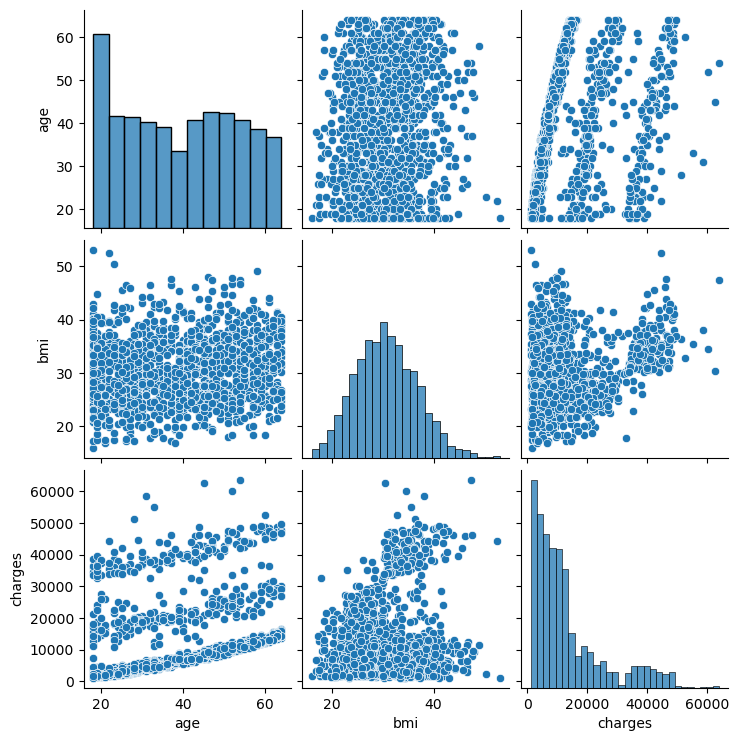

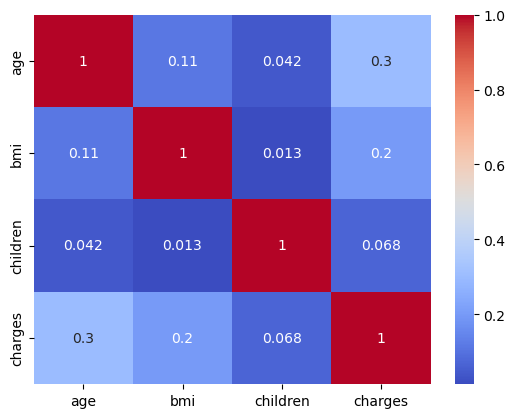

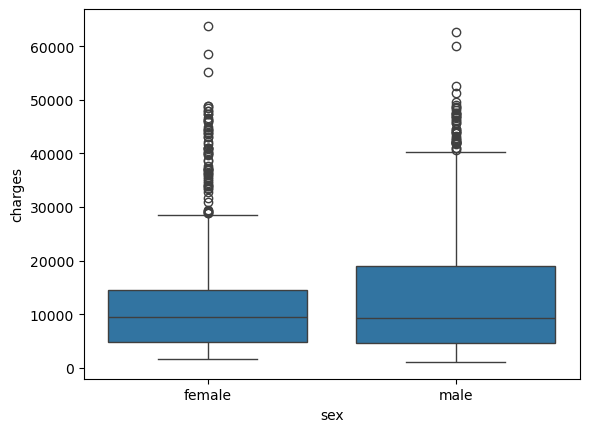

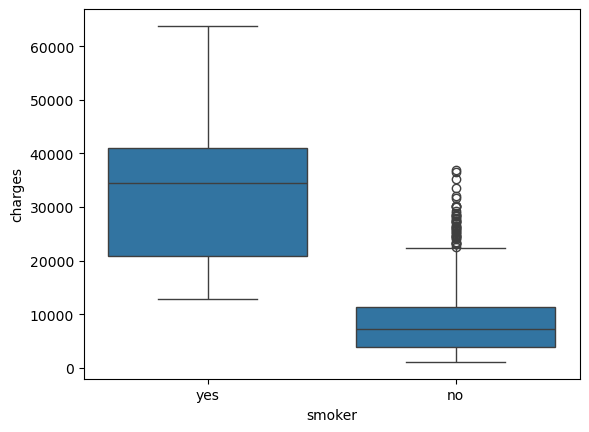

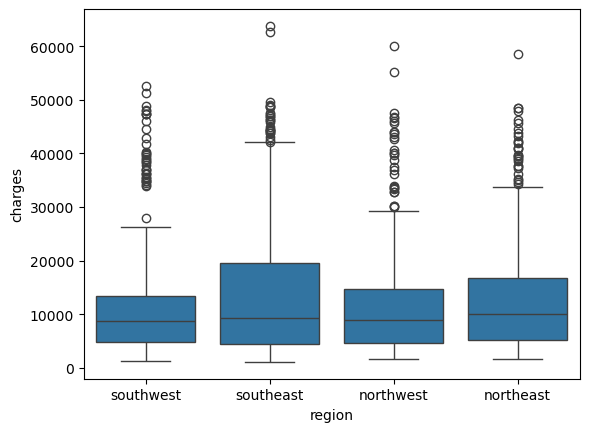

ANOVA result for smoker vs charges: F-statistic = 2177.614868056519, p-value = 8.271435842182967e-283


C:\Users\faizr\AppData\Local\Temp\ipykernel_12336\1688337512.py:21: DeprecationWarning: Please import `f_oneway` from the `scipy.stats` namespace; the `scipy.stats.stats` namespace is deprecated and will be removed in SciPy 2.0.0.
  anova_result = stats.f_oneway(df[df['smoker'] == 'yes']['charges'],


In [24]:
# Scatter plot between numerical variables
sns.pairplot(df[['age', 'bmi', 'charges']])
plt.show()

# Correlation matrix
corr_matrix = df[numerical_feature].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

# Box plot: Categorical vs Numerical
sns.boxplot(x='sex', y='charges', data=df)
plt.show()

sns.boxplot(x='smoker', y='charges', data=df)
plt.show()

sns.boxplot(x='region', y='charges', data=df)
plt.show()

# ANOVA for categorical vs numerical relationships (Example for smoker vs. charges)
anova_result = stats.f_oneway(df[df['smoker'] == 'yes']['charges'],
                              df[df['smoker'] == 'no']['charges'])
print(f"ANOVA result for smoker vs charges: F-statistic = {anova_result.statistic}, p-value = {anova_result.pvalue}")


# Step 5: Multivariate Analysis
In the multivariate analysis, a pair plot was generated to explore relationships between all variables in the dataset. This comprehensive visualization helps identify interactions, correlations, and patterns across multiple variables simultaneously, providing deeper insights into the dataset's structure.

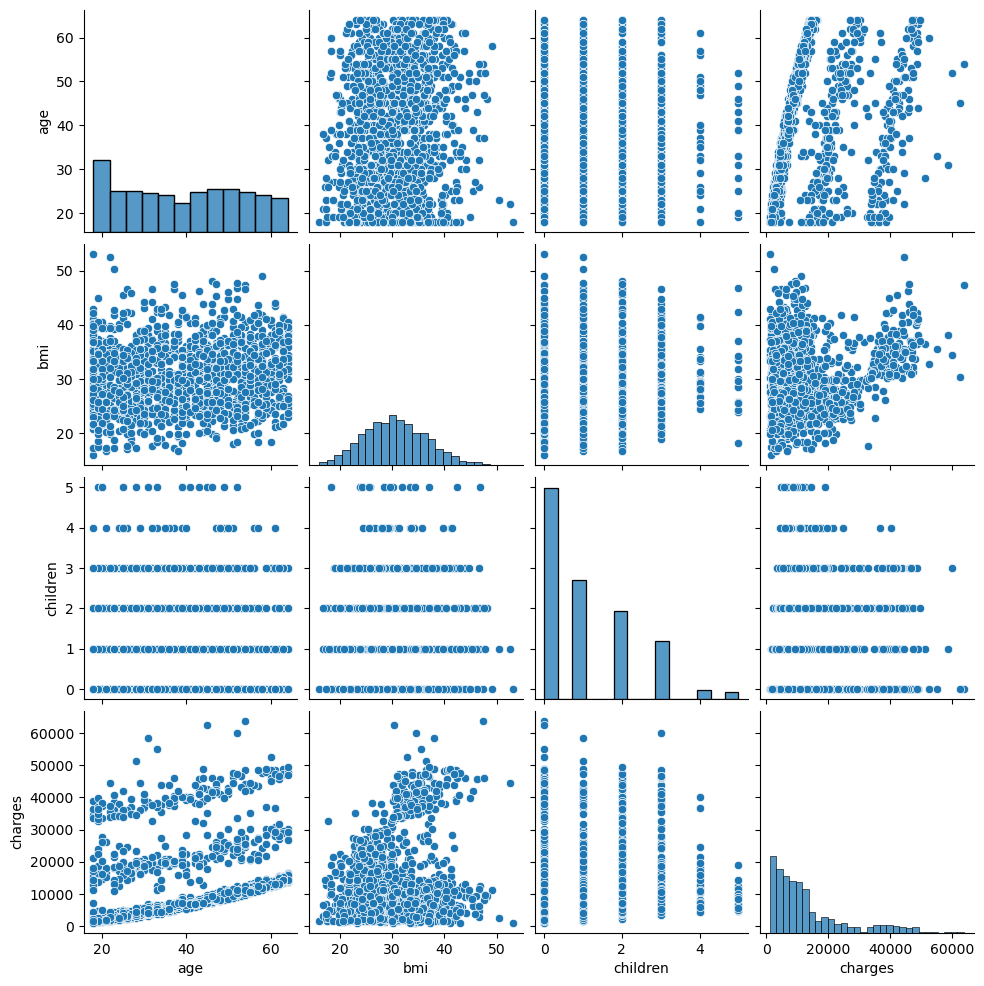

In [26]:
# Pair plot to explore relationships between all variables
sns.pairplot(df)
plt.show()

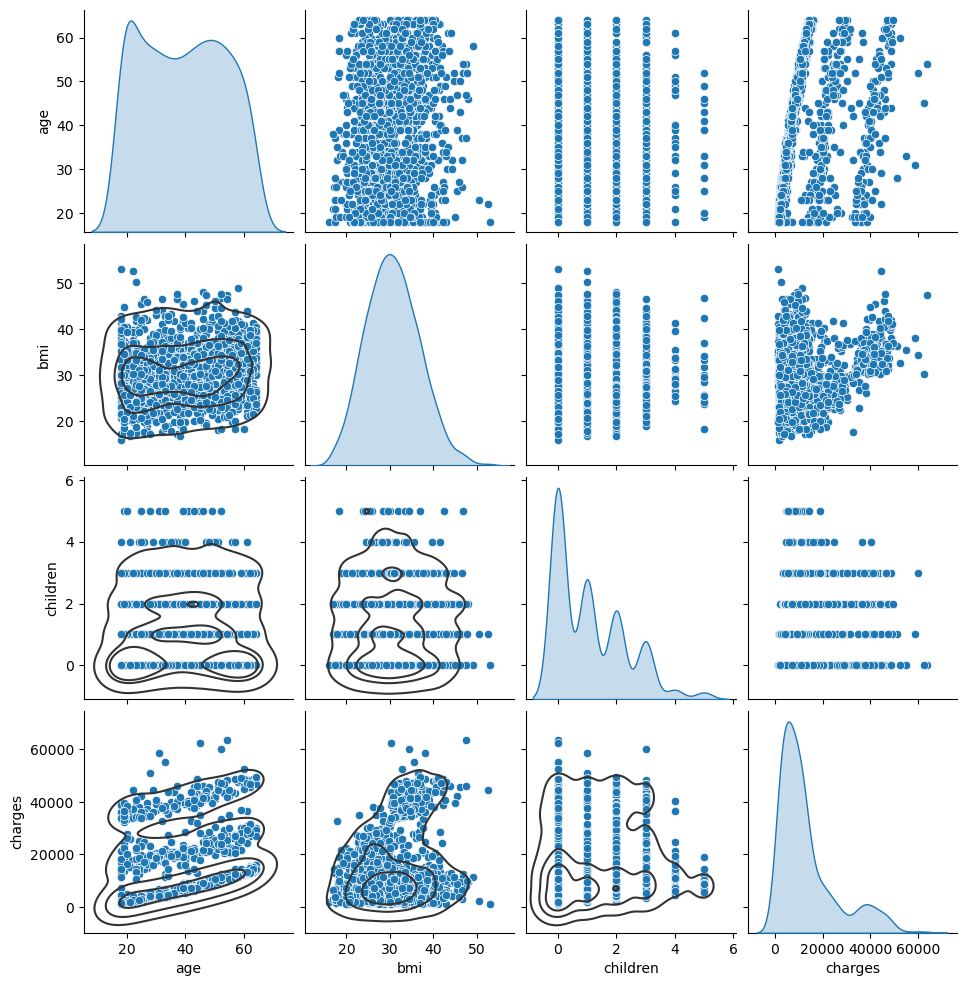

In [27]:
g = sns.pairplot(df, diag_kind="kde")
g.map_lower(sns.kdeplot, levels=4, color=".2")
plt.show()

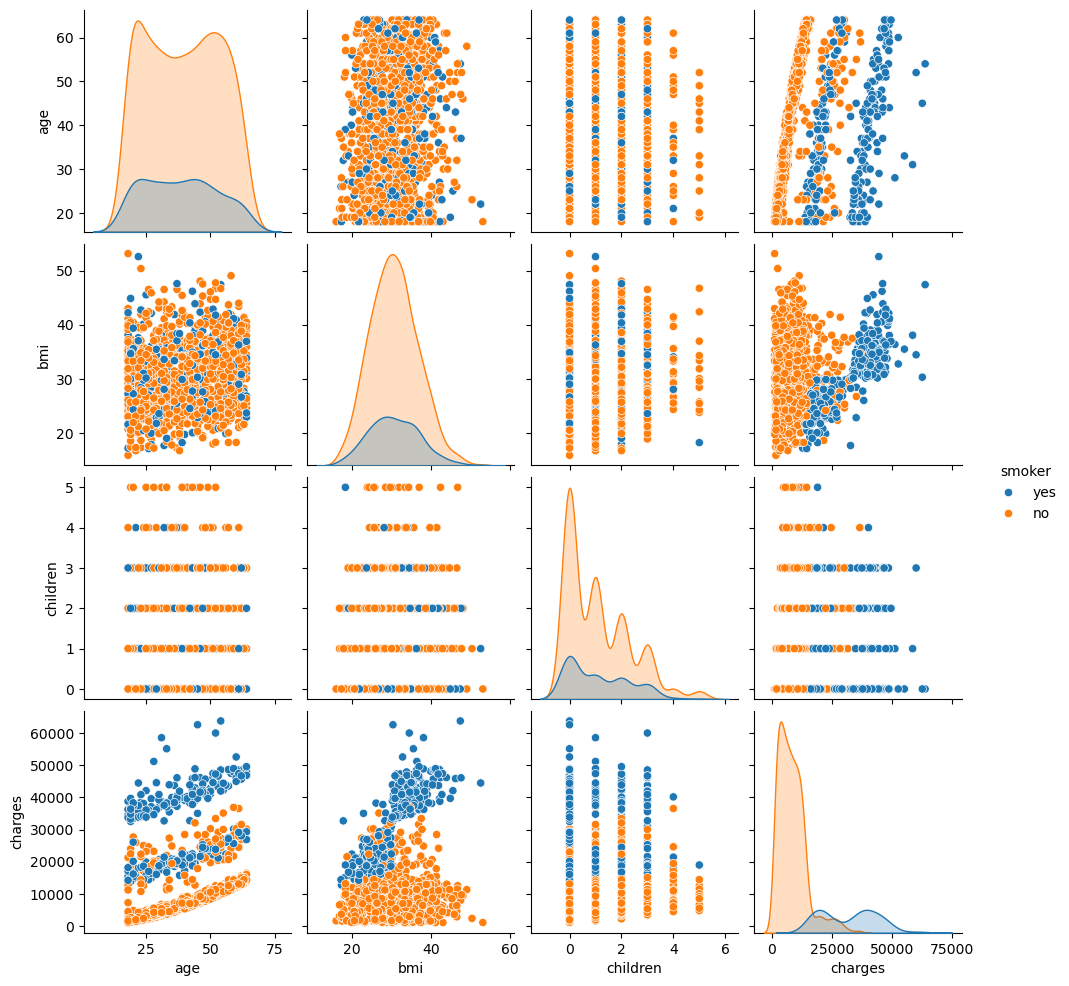

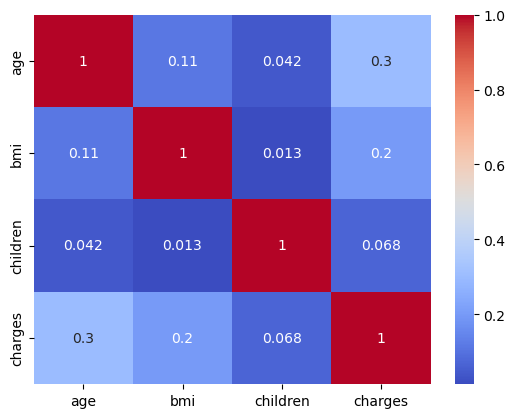

In [28]:
# Pair plot to explore relationships between all variables
sns.pairplot(df, hue='smoker')
plt.show()

# Heatmap of correlations
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

# Step 6: Outlier Detection
For outlier detection, box plots were created for the numerical features `age`, `bmi`, and `charges`. These plots visually highlight the presence of outliers by displaying data points that fall outside the interquartile range. This helps in identifying any extreme values that may need further investigation or handling during analysis.

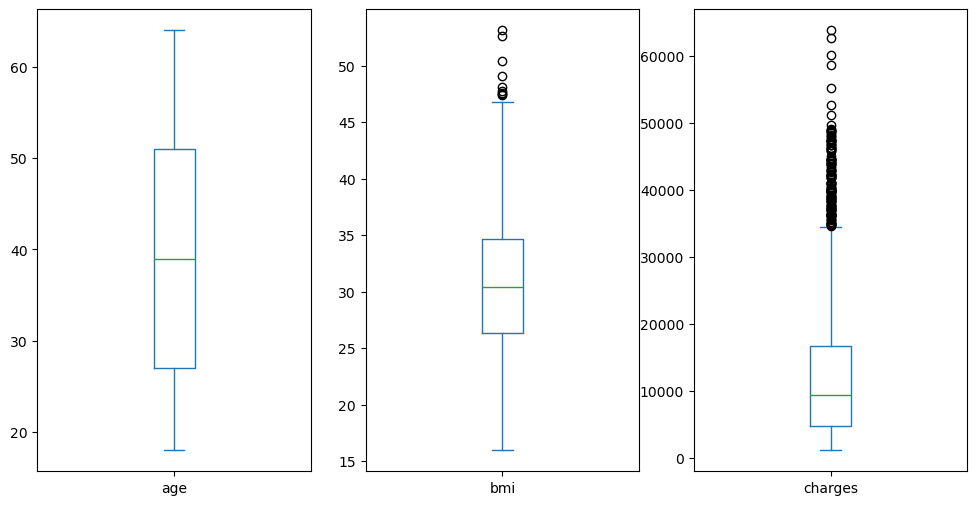

In [30]:
# Box plots to visualize outliers
df[['age', 'bmi', 'charges']].plot(kind='box', subplots=True, layout=(1, 3), figsize=(12, 6))
plt.show()

# Step 7: Feature Engineering
In feature engineering, new features were created to enhance the dataset's predictive power. A `bmi_category` feature was introduced by categorizing BMI into `Underweight`, `Normal weight`, `Overweight`, and `Obese` based on standard BMI ranges. Additionally, a log transformation was applied to the `charges` variable to address skewness, resulting in a new `log_charges` feature. These engineered features were then checked to ensure they were correctly added to the dataset.

In [14]:
# Example: Create a new feature for BMI categories
df['bmi_category'] = pd.cut(df['bmi'], bins=[0, 18.5, 24.9, 29.9, 100], 
                            labels=['Underweight', 'Normal weight', 'Overweight', 'Obese'])

# Log transformation on charges (if the distribution is skewed)
df['log_charges'] = np.log(df['charges'] + 1)

# Check the new features
df.head()

,age,sex,bmi,children,smoker,region,charges,bmi_category,log_charges
0,19,female,27.900,0,yes,southwest,16884.92400,Overweight,9.734236
1,18,male,33.770,1,no,southeast,1725.55230,Obese,7.453882
2,28,male,33.000,3,no,southeast,4449.46200,Obese,8.400763
3,33,male,22.705,0,no,northwest,21984.47061,Normal weight,9.998137
4,32,male,28.880,0,no,northwest,3866.85520,Overweight,8.260455


# Step 8: Data Transformations

In [17]:
categorical_feature = [x for x in df.columns if df.dtypes[x] == 'object' or df.dtypes[x] == 'category']  
numerical_feature = [x for x in df.columns if df.dtypes[x] == 'int64' or df.dtypes[x] == 'float64']

print(f"Numerical Features: {numerical_feature}\n")
print(f'Categorical Features: {categorical_feature}\n')

Numerical Features: ['age', 'bmi', 'children', 'charges', 'log_charges']

Categorical Features: ['sex', 'smoker', 'region', 'bmi_category']



In [19]:
df.dtypes

age                int64
sex               object
bmi              float64
children           int64
smoker            object
region            object
charges          float64
bmi_category    category
log_charges      float64
dtype: object

In this data transformation step, categorical features (`sex`, `smoker`, `region`, and `bmi_category`) were encoded into numerical values using `LabelEncoder`. This process converts categorical data into a format that can be used by machine learning algorithms, which typically require numerical input. After encoding, the dataset was updated, and the transformed features were checked to ensure they were correctly encoded.

In [21]:
le = LabelEncoder()
df['sex'] = le.fit_transform(df['sex'])
df['smoker'] = le.fit_transform(df['smoker'])
df['region'] = le.fit_transform(df['region'])
df['bmi_category'] = le.fit_transform(df['bmi_category'])
df.head()

,age,sex,bmi,children,smoker,region,charges,bmi_category,log_charges
0,19,0,27.900,0,1,3,16884.92400,2,9.734236
1,18,1,33.770,1,0,2,1725.55230,1,7.453882
2,28,1,33.000,3,0,2,4449.46200,1,8.400763
3,33,1,22.705,0,0,1,21984.47061,0,9.998137
4,32,1,28.880,0,0,1,3866.85520,2,8.260455


In [23]:
scaler = StandardScaler()
scaler_df = scaler.fit_transform(df)
df_scaler = pd.DataFrame(scaler_df, columns = df.columns)
df_scaler.head()

,age,sex,bmi,children,smoker,region,charges,bmi_category,log_charges
0,-1.438764,-1.010519,-0.453320,-0.908614,1.970587,1.343905,0.298584,1.214721,0.691385
1,-1.509965,0.989591,0.509621,-0.078767,-0.507463,0.438495,-0.953689,-0.214740,-1.789861
2,-0.797954,0.989591,0.383307,1.580926,-0.507463,0.438495,-0.728675,-0.214740,-0.759562
3,-0.441948,0.989591,-1.305531,-0.908614,-0.507463,-0.466915,0.719843,-1.644200,0.978536
4,-0.513149,0.989591,-0.292556,-0.908614,-0.507463,-0.466915,-0.776802,1.214721,-0.912231


# Step 9: Statistical Tests (Hypothesis Testing)
In the context of hypothesis testing, the Pearson correlation was used to assess the strength of the linear relationship between the target variable `charges` and other features in the dataset. The squared correlation values were calculated to determine how much of the variance in `charges` can be explained by each feature.

The squared Pearson correlation values (`correlation['charges'].sort_values(ascending=False)`) were sorted in descending order to identify which features have the strongest relationship with `charges`. This helps in understanding which variables are most influential in predicting `charges` and provides a basis for further statistical testing and model building.

In [26]:
# Pearson Correlation
correlation = df_scaler.corr()**2
print(correlation['charges'].sort_values(ascending=False))

charges         1.000000
log_charges     0.797442
smoker          0.619765
age             0.089406
bmi             0.039339
children        0.004624
sex             0.003282
bmi_category    0.001378
region          0.000039
Name: charges, dtype: float64


# Step 10: Prepare the Data for Machine Learning Models

In [29]:
X = df_scaler.drop('charges', axis=1)
y = df_scaler['charges']         

In [31]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of y_train: {y_train.shape}\n")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_test: {y_test.shape}\n")
print(f"Shape of X_test: {X_val.shape}")
print(f"Shape of y_train: {y_val.shape}")

Shape of X_train: (1070, 8)
Shape of y_train: (1070,)

Shape of X_test: (134, 8)
Shape of y_test: (134,)

Shape of X_test: (134, 8)
Shape of y_train: (134,)


In this model evaluation process, several regression models were initialized and trained on the dataset, including Linear Regression, Support Vector Machine (SVR), Random Forest, Decision Tree, and Gradient Boosting. Each model was trained and validated, with key performance metrics such as Mean Squared Error (MSE) and R-squared calculated to assess their accuracy. The time taken to train and validate each model was also recorded.

The results were stored in dictionaries for comparison. A bar plot was generated to visualize the R-squared values, showing the accuracy of each model. Another bar plot displayed the time taken by each model, providing insight into the computational efficiency of the models. This analysis helps in selecting the most suitable model based on both performance and computational efficiency.

The results show that Random Forest, Decision Tree, and Gradient Boosting have the highest accuracy, with extremely low MSE and nearly perfect R-squared values. Among them, the Decision Tree stands out as the most efficient, offering a great balance between accuracy and training time. Linear Regression, while the fastest, is less accurate compared to the other models.

Model: Linear Regression
Mean Squared Error: 0.08451199316593629
R-squared: 0.9131518663627874
Time Taken: 0.02500009536743164 seconds

Model: Support Vector Machine
Mean Squared Error: 0.010124072813386393
R-squared: 0.9895960703834844
Time Taken: 0.09434843063354492 seconds

Model: Random Forest
Mean Squared Error: 2.4666710126101454e-05
R-squared: 0.9999746514351731
Time Taken: 0.9183146953582764 seconds

Model: Decision Tree
Mean Squared Error: 7.426368781966642e-05
R-squared: 0.999923683462636
Time Taken: 0.01788187026977539 seconds

Model: Gradient Boosting
Mean Squared Error: 5.6218055646340464e-05
R-squared: 0.9999422279249761
Time Taken: 0.30111169815063477 seconds



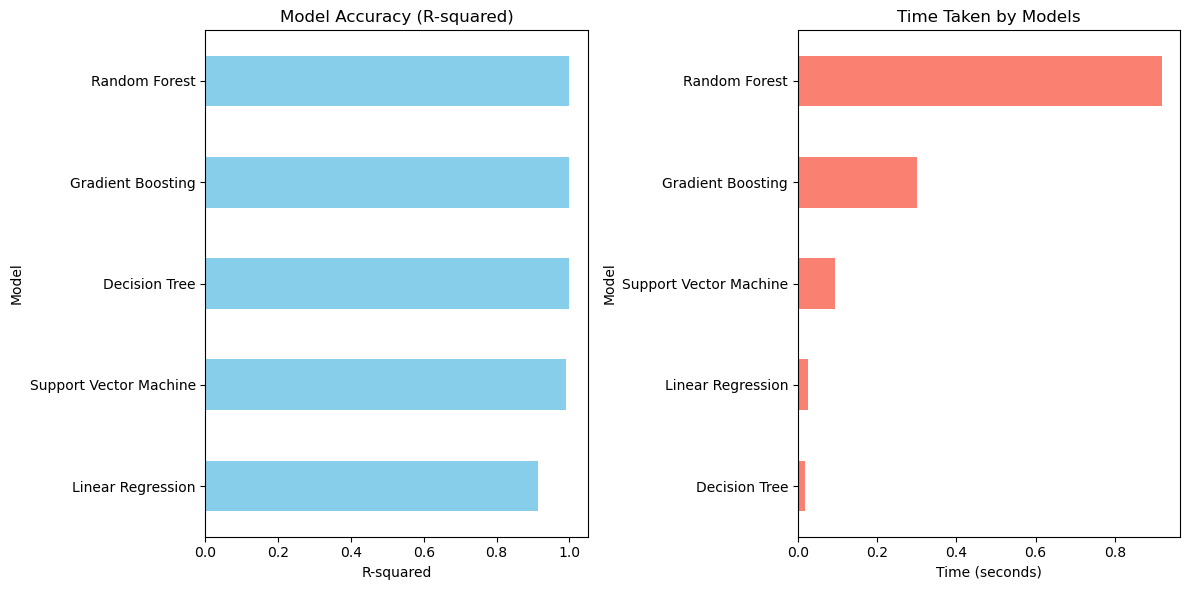

In [33]:
# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Support Vector Machine': SVR(),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42)
}

# Dictionaries to store results
results = {}
time_taken = {}

# Loop through models
for name, model in models.items():
    start_time = time.time()
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Validate the model
    y_pred = model.predict(X_val)
    
    # Calculate metrics
    mse = mean_squared_error(y_val, y_pred)
    r2 = r2_score(y_val, y_pred)
    
    # Calculate time taken
    elapsed_time = time.time() - start_time
    
    # Store results
    results[name] = {
        'Mean Squared Error': mse,
        'R-squared': r2
    }
    time_taken[name] = elapsed_time

    # Print evaluation metrics for each model
    print(f"Model: {name}")
    print(f"Mean Squared Error: {mse}")
    print(f"R-squared: {r2}")
    print(f"Time Taken: {elapsed_time} seconds\n")

# Convert results to DataFrame for better visualization
results_df = pd.DataFrame(results).T
time_taken_df = pd.DataFrame(time_taken, index=['Time Taken']).T

# Plot accuracy (R-squared) of models
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
results_df['R-squared'].sort_values().plot(kind='barh', color='skyblue')
plt.title('Model Accuracy (R-squared)')
plt.xlabel('R-squared')
plt.ylabel('Model')

# Plot time taken by models
plt.subplot(1, 2, 2)
time_taken_df['Time Taken'].sort_values().plot(kind='barh', color='salmon')
plt.title('Time Taken by Models')
plt.xlabel('Time (seconds)')
plt.ylabel('Model')

plt.tight_layout()
plt.show()

# ANN
In this process, an Artificial Neural Network (ANN) model was built using the Sequential API from Keras. The model consists of three layers: an input layer with 128 units, a hidden layer with 64 units, both using ReLU activation, and an output layer with a single unit for regression.

The model was compiled with the Adam optimizer, using Mean Squared Error as the loss function and Mean Absolute Error (MAE) as an additional metric. The model was trained over 200 epochs with a batch size of 10, and the training history was captured to monitor the performance.

After training, the model was evaluated on the test data, yielding a test loss and MAE, which indicate the model's performance on unseen data. The training and validation losses, along with MAE, were plotted over epochs to visualize the model's learning process and to check for overfitting or underfitting during train

The plots show that both training and validation loss, as well as MAE, decrease rapidly in the first 25 epochs, indicating effective learning. The metrics stabilize with minor fluctuations afterward, and the close alignment between training and validation curves suggests that the model generalizes well without overfitting, reflecting strong overall performance.ing.

Epoch 1/200


C:\Users\faizr\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


94/94 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 0.5205 - mae: 0.4503 - val_loss: 0.0423 - val_mae: 0.1228
Epoch 2/200
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0429 - mae: 0.1314 - val_loss: 0.0203 - val_mae: 0.0833
Epoch 3/200
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0237 - mae: 0.0924 - val_loss: 0.0173 - val_mae: 0.0825
Epoch 4/200
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0152 - mae: 0.0773 - val_loss: 0.0118 - val_mae: 0.0711
Epoch 5/200
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0106 - mae: 0.0662 - val_loss: 0.0103 - val_mae: 0.0665
Epoch 6/200
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0070 - mae: 0.0563 - val_loss: 0.0099 - val_mae: 0.0580
Epoch 7/200
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0085 - mae: 0.0639 - val_loss: 0.0079 - val_mae: 0.0547
Epoch 8/200
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0057 - mae: 0.0484 - val_loss: 0.0069 - val_mae: 0.0541
Epoch 9/200
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0076 - mae: 0.0

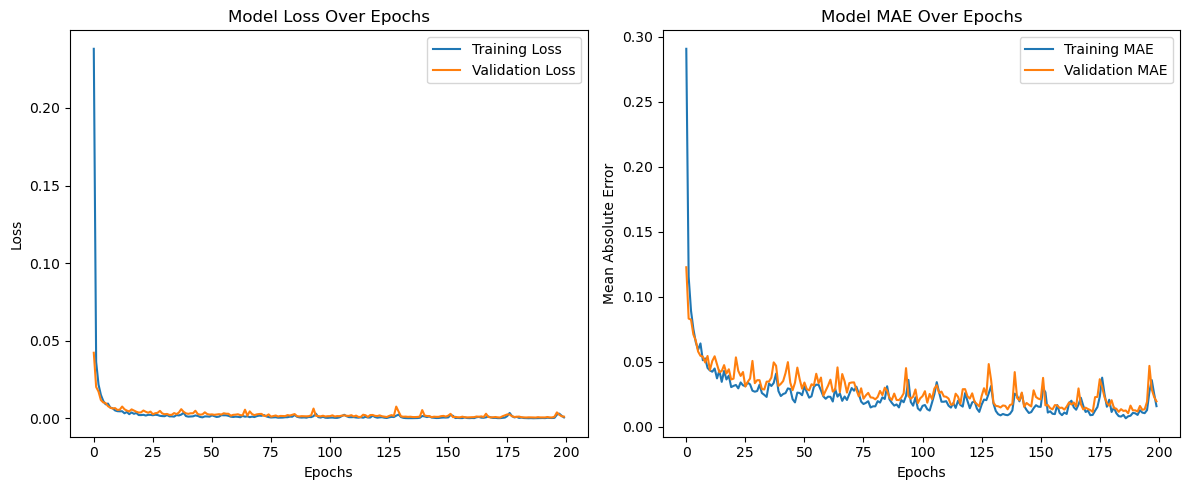

In [55]:
# Build the ANN model
model = Sequential([
    Dense(units=128, activation='relu', input_dim=X_train.shape[1]),
    Dense(units=64, activation='relu'),
    Dense(units=1)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Train the model and capture the training history
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=200, batch_size=10)

# Evaluate the model on the test data
test_loss, test_mae = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss}")
print(f"Test MAE: {test_mae}")

# Plotting the training and validation loss over epochs
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plotting the training and validation MAE over epochs
plt.subplot(1, 2, 2)
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title('Model MAE Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error')
plt.legend()

plt.tight_layout()
plt.show()

# ANN With 1DConv
In this approach, a 1D Convolutional Neural Network (Conv1D) was combined with Dense layers to model the data. The input features were reshaped to be compatible with the Conv1D layers. The dataset was split into training, validation, and test sets, ensuring proper model evaluation.

The model began with two Conv1D layers with 32 and 64 filters, followed by a Flatten layer to transition into Dense layers. These Dense layers were used to refine the learned features and output the final prediction.

The model was trained for 200 epochs, with the training history capturing the loss and MAE over epochs. After training, the model's performance was evaluated on the test data, showing the test loss and MAE.

The training and validation loss and MAE were plotted over the epochs, helping visualize the model's learning process and ensuring there was no overfitting or underfi

The plots show that both training and validation loss, as well as MAE, drop sharply in the initial epochs and stabilize near zero, indicating effective learning. The close alignment between the training and validation curves suggests that the model generalizes well and avoids overfitting, demonstrating strong overall performance.tting.

Epoch 1/200


C:\Users\faizr\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


94/94 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - loss: 0.4492 - mae: 0.4701 - val_loss: 0.0470 - val_mae: 0.1315
Epoch 2/200
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0480 - mae: 0.1348 - val_loss: 0.0153 - val_mae: 0.0922
Epoch 3/200
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0188 - mae: 0.0908 - val_loss: 0.0107 - val_mae: 0.0646
Epoch 4/200
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0164 - mae: 0.0796 - val_loss: 0.0056 - val_mae: 0.0450
Epoch 5/200
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0093 - mae: 0.0594 - val_loss: 0.0047 - val_mae: 0.0437
Epoch 6/200
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0081 - mae: 0.0584 - val_loss: 0.0176 - val_mae: 0.0900
Epoch 7/200
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0153 - mae: 0.0836 - val_loss: 0.0065 - val_mae: 0.0570
Epoch 8/200
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0089 - mae: 0.0611 - val_loss: 0.0058 - val_mae: 0.0505
Epoch 9/200
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0051 - mae: 0.0

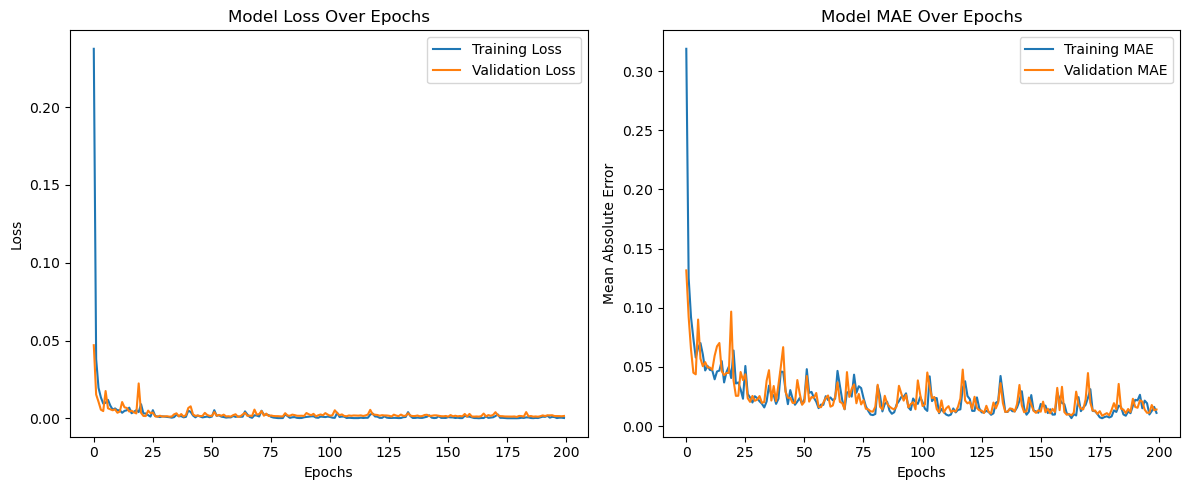

In [38]:
X = X.values.reshape((X.shape[0], X.shape[1], 1))

# Split the data
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Build the model with Conv1D layers followed by Dense layers
model = Sequential()

# Add Conv1D layers
model.add(Conv1D(filters=32, kernel_size=2, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Conv1D(filters=64, kernel_size=2, activation='relu'))
model.add(Flatten())

# Add Dense (ANN) layers
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Train the model and capture the training history
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=200, batch_size=10)

# Evaluate the model on the test data
test_loss, test_mae = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss}")
print(f"Test MAE: {test_mae}")

# Plotting the training and validation loss over epochs
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plotting the training and validation MAE over epochs
plt.subplot(1, 2, 2)
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title('Model MAE Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error')
plt.legend()

plt.tight_layout()
plt.show()